# Deep Learning 1 to 6
## Pavithiran V

# WEEK-2 I. IMAGE CLASSIFICATION
#### a. BASIC IMAGE CLASSIFICATION USING CIFAR-10 DATASET

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


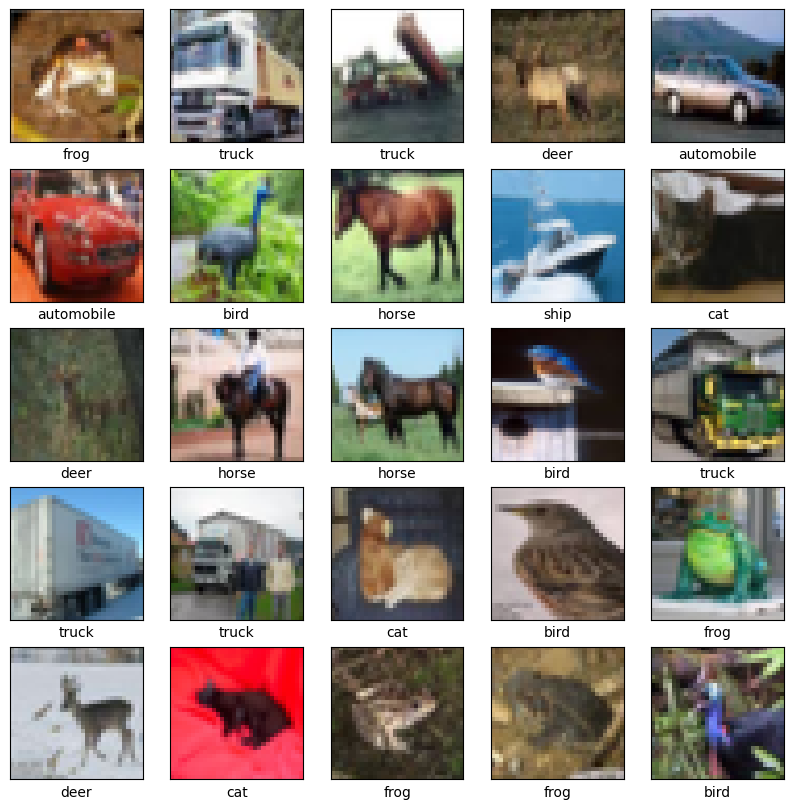

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1727274109.830962     101 service.cc:145] XLA service 0x7de870004e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727274109.831018     101 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727274109.831022     101 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  70/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1477 - loss: 2.2835

I0000 00:00:1727274112.513942     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3579 - loss: 1.7512 - val_accuracy: 0.5685 - val_loss: 1.1986
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5868 - loss: 1.1700 - val_accuracy: 0.6418 - val_loss: 1.0275
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6532 - loss: 0.9987 - val_accuracy: 0.6617 - val_loss: 0.9682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6949 - loss: 0.8746 - val_accuracy: 0.6768 - val_loss: 0.9270
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7188 - loss: 0.8016 - val_accuracy: 0.7087 - val_loss: 0.8492
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7394 - loss: 0.7458 - val_accuracy: 0.7022 - val_loss: 0.8785
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7564 - loss: 0.6954 - val_accuracy: 0.7182 - val_loss: 0.8374
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7710 - loss: 0.6521 - val_accura

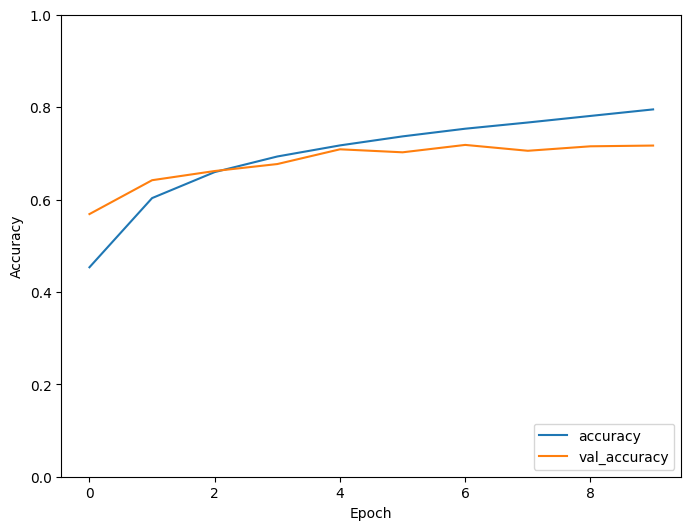

In [1]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the Data
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualize the Data
# Class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#### b. HANDWRITTEN DIGIT RECOGNITION USING CNNS (MNIST DATASET)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8903 - loss: 0.3480 - val_accuracy: 0.9829 - val_loss: 0.0525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0468 - val_accuracy: 0.9878 - val_loss: 0.0392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9894 - loss: 0.0316 - val_accuracy: 0.9879 - val_loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0261 - val_accuracy: 0.9927 - val_loss: 0.0243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9904 - val_loss: 0.0303
313/313 - 0s - 1ms/step - accuracy: 0.9904 - loss: 0.0303

Test accuracy: 0.9904000163078308


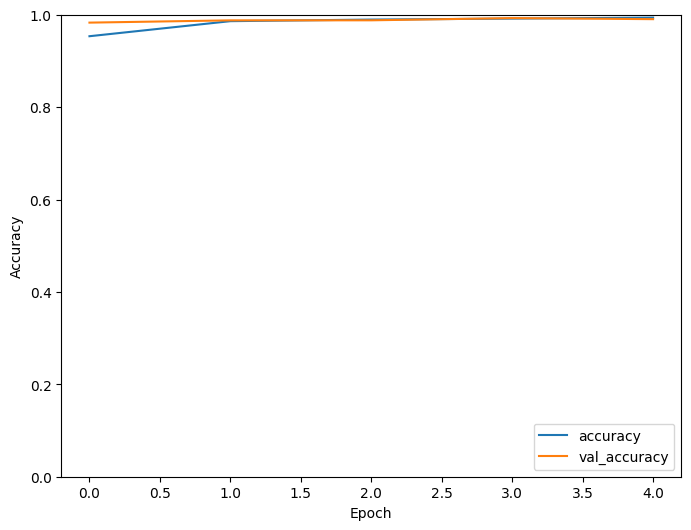

In [3]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the Data
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#### c. FINE-TUNING PRE-TRAINED MODELS FOR CAT VS. DOG CLASSIFICATION

Found 555 files belonging to 2 classes.
Found 138 files belonging to 2 classes.


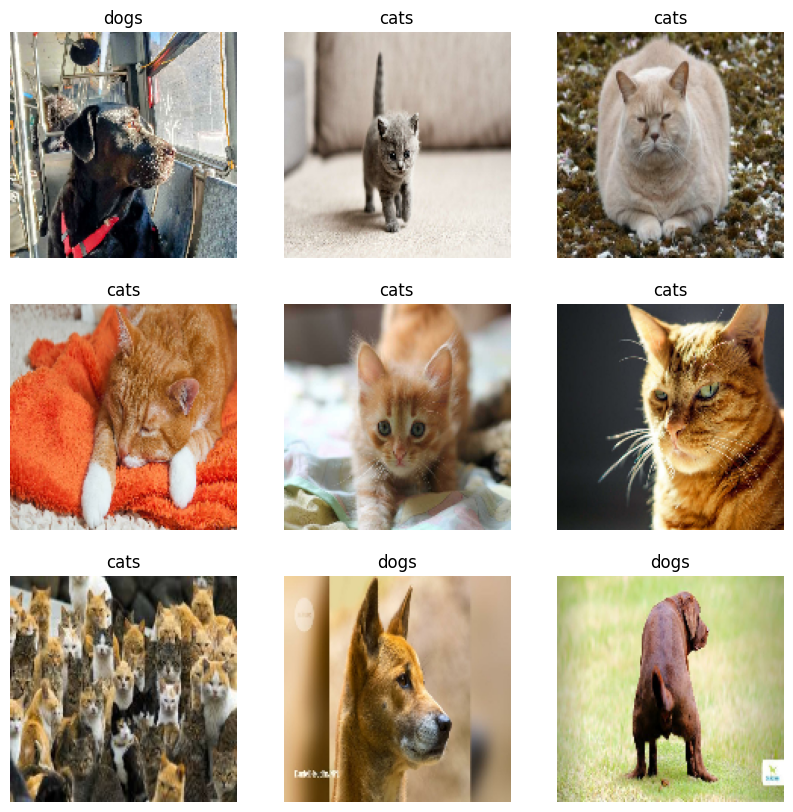

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 624ms/step - accuracy: 0.7117 - loss: 8.8939 - val_accuracy: 0.8551 - val_loss: 5.4759
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9230 - loss: 4.0066 - val_accuracy: 0.8406 - val_loss: 3.7258
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9561 - loss: 1.1221 - val_accuracy: 0.8696 - val_loss: 3.3653
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9686 - loss: 0.5208 - val_accuracy: 0.8696 - val_loss: 4.1598
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9802 - loss: 0.2146 - val_accuracy: 0.8913 - val_loss: 3.3215
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 836ms/step - accuracy: 0.9796 - loss: 0.1739 - val_accuracy: 0.8696 - val_loss: 3.2079
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.9762 - loss: 0.2016 - val_accuracy: 0.8768 - val_loss: 2.6422
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy:

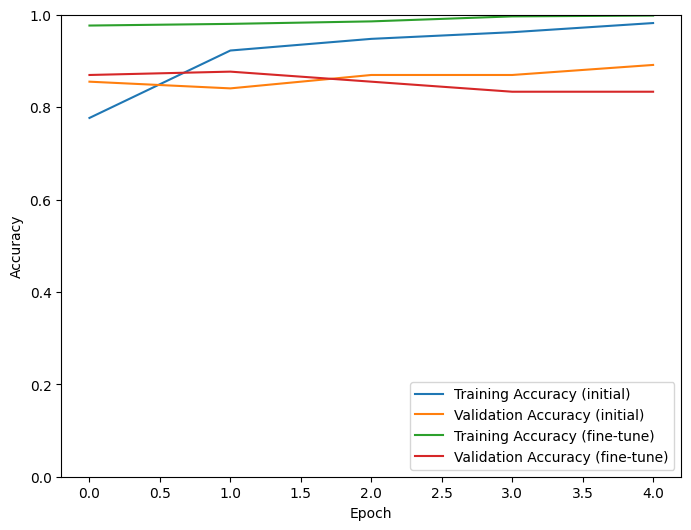

In [4]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load and Preprocess the Data
# Define paths to the train and validation datasets
train_dir = '/kaggle/input/catcat/train'
val_dir = '/kaggle/input/catcat/test'

# Load the Cats vs. Dogs dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

# Define the class names
class_names = train_dataset.class_names

# Visualize the Data
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

# Build the Model Using a Pre-trained Base
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)

# Fine-Tune the Model (Optional)
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=5)

# Evaluate the Model
val_loss, val_acc = model.evaluate(val_dataset, verbose=2)
print(f'\nValidation accuracy: {val_acc}')

# Plot Training History
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy (initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (initial)')
plt.plot(fine_tune_history.history['accuracy'], label='Training Accuracy (fine-tune)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy (fine-tune)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Week 3

## a.Basic Object Detection Using OpenCV and Haar Cascades


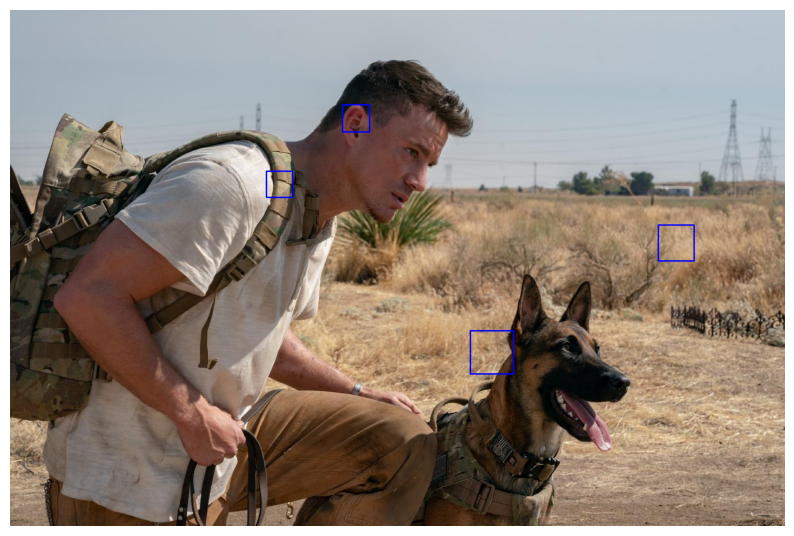

In [12]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread('/kaggle/input/catcat/train/dogs/dog_10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### b

In [13]:
!pip install opencv-python-headless
!pip install numpy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [14]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

--2024-09-25 14:35:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

yolov3.weights      100%[===================>] 236.52M  11.5MB/s    in 18s     

2024-09-25 14:36:14 (13.2 MB/s) - 'yolov3.weights' saved [248007048/248007048]

--2024-09-25 14:36:15--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: 'yolov3.cfg'

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

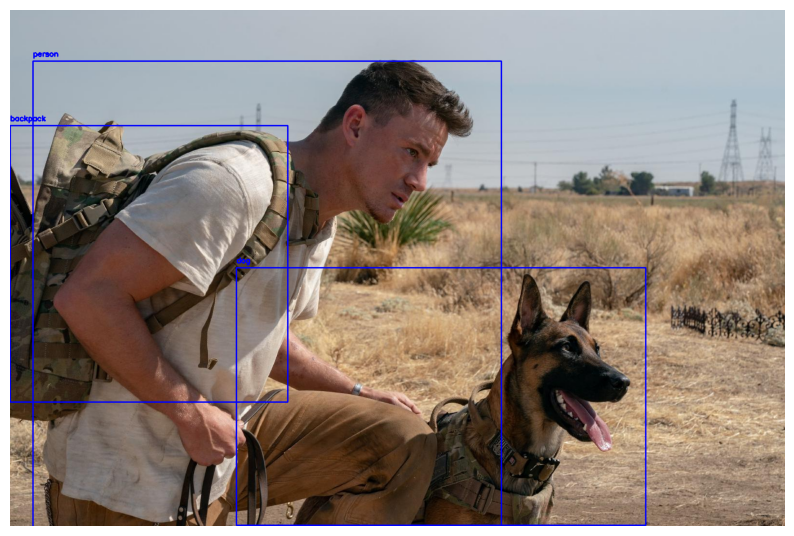

In [16]:
import cv2
import numpy as np

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')
    
img = cv2.imread('/kaggle/input/catcat/train/dogs/dog_10.jpg')
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## C.  MASK R-CNN FOR INSTANCE SEGMENTATION

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 194MB/s] 


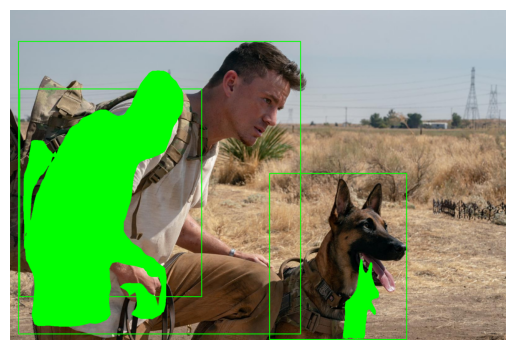

In [20]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Install necessary packages (for local execution)
# !pip install torch torchvision

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image = cv2.imread("/kaggle/input/catcat/train/dogs/dog_10.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform the image to a tensor
image_tensor = F.to_tensor(image_rgb)

# Add a batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(image_tensor)

# Get the masks, boxes, and labels
masks = outputs[0]['masks']
boxes = outputs[0]['boxes']
labels = outputs[0]['labels']
scores = outputs[0]['scores']

# Set the confidence threshold
conf_threshold = 0.5

# Loop over the detections
for i in range(len(masks)):
    if scores[i] > conf_threshold:
        # Extract the mask and bounding box
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        box = boxes[i].cpu().numpy().astype(int)
        label = labels[i].cpu().numpy()

        # Apply the mask to the image
        mask = cv2.resize(mask, (box[2] - box[0], box[3] - box[1]))
        mask = mask > 128

        roi = image[box[1]:box[3], box[0]:box[2]]
        roi[mask] = [0, 255, 0]

        # Draw the bounding box
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the output image using matplotlib
plt.imshow(output_image)
plt.axis('off')  # Hide the axis
plt.show()


# Week 4

# a. BASIC OBJECT CLASSIFICATION USING PRE-TRAINED VGG16 MODEL

In [2]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load the VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Create data generators for data augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727275335.010731      96 service.cc:145] XLA service 0x7cec7400f940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727275335.010793      96 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   8/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.1017 - loss: 17.1536

I0000 00:00:1727275337.483601      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.4693 - loss: 3.2503 - val_accuracy: 0.6165 - val_loss: 1.1318
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6059 - loss: 1.1279 - val_accuracy: 0.6382 - val_loss: 1.0715
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6312 - loss: 1.0581 - val_accuracy: 0.6471 - val_loss: 1.0485
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6448 - loss: 1.0245 - val_accuracy: 0.6488 - val_loss: 1.0721
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6482 - loss: 1.0028 - val_accuracy: 0.6508 - val_loss: 1.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6525 - loss: 1.0309
Test Accuracy: 65.08%


# b. IMAGENET CLASSIFICATION WITH DEEP RESIDUAL NETWORKS (RESNET)

In [4]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load an image file that contains an image to be classified
img_path = '/kaggle/input/catcat/train/dogs/dog_10.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a batch dimension (since the model expects a batch of images)
x = np.expand_dims(x, axis=0)

# Preprocess the input image for the model
x = preprocess_input(x)

# Predict the class of the image
predictions = model.predict(x)

# Decode the top 3 predictions into human-readable class names
print('Predicted:', decode_predictions(predictions, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02105162', 'malinois', 0.804456), ('n03803284', 'muzzle', 0.050654963), ('n02106662', 'German_shepherd', 0.035840467)]


# C. CLASSIFYING SPECIES OF FLOWERS USING TRANSFER LEARNING

In [6]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Set up data directories
train_dir = '/kaggle/input/flower-classification-5-classes-roselilyetc/Flower Classification/Flower Classification/Testing Data'
valid_dir = '/kaggle/input/flower-classification-5-classes-roselilyetc/Flower Classification/Flower Classification/Training Data'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')

# Load the pre-trained VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=[early_stopping])

# Evaluate the model on validation data
loss, accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Found 958 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4145 - loss: 3.3267 - val_accuracy: 0.6896 - val_loss: 0.8898
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 480ms/step - accuracy: 0.8097 - loss: 0.5312 - val_accuracy: 0.7250 - val_loss: 0.8053
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.9604 - loss: 0.1881 - val_accuracy: 0.7444 - val_loss: 0.7877
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 459ms/step - accuracy: 0.9878 - loss: 0.1073 - val_accuracy: 0.7310 - val_loss: 0.8181
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 469ms/step - accuracy: 1.0000 - loss: 0.0458 - val_accuracy: 0.7536 - val_loss: 0.7745
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.7415 - loss: 0.8198
Validation Accuracy: 75.36%


# Week 5

# A. BASIC TEXT CLASSIFICATION USING NAIVE BAYES AND BAG-OF-WORDS

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset
data = pd.read_csv('/kaggle/input/newsarticlecategories/news-article-categories.csv')  # Assume CSV has two columns: 'headline' and 'category'

# Step 2: Split Dataset into Features (X) and Target (y)
X = data['category']  # Features (news headlines)
y = data['title']  # Labels (news categories)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Text Preprocessing - Bag-of-Words (BoW)
vectorizer = CountVectorizer()  # Convert text to BoW representation
X_train_bow = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_bow = vectorizer.transform(X_test)  # Transform test data (use the same vocabulary as train data)

# Step 5: Build and Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# Step 6: Predict on Test Data
y_pred = nb_model.predict(X_test_bow)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
# i have commented the below line code....because the result is big....remove the comment(#) and run
# print(classification_report(y_test, y_pred))

Accuracy: 0.36%
Classification Report:


# B. NEWS ARTICLE CATEGORIZATION USING BERT

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset with 'category', 'title', and 'body' columns
df = pd.read_csv('/kaggle/input/newsarticlecategories/news-article-categories.csv')

# Convert categories to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

# Ensure the 'body' column contains strings (in case of NaNs or other issues)
df['body'] = df['body'].astype(str)

# Split the dataset into training and testing sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df['body'], df['category'], test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
max_length = 128  # Maximum token length
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_length)

# Convert labels to tensors
train_labels = torch.tensor(train_labels.tolist())
val_labels = torch.tensor(val_labels.tolist())

# Convert encodings to tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_masks = torch.tensor(train_encodings['attention_mask'])

val_input_ids = torch.tensor(val_encodings['input_ids'])
val_attention_masks = torch.tensor(val_encodings['attention_mask'])

# Create PyTorch dataset
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)

# Create DataLoader for efficient batch processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['category'].unique()))
model = model.to('cuda')  # If using a GPU

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_masks, labels = [b.to('cuda') for b in batch]
        
        optimizer.zero_grad()
        
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_train_loss}')

# Evaluation
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_masks, labels = [b.to('cuda') for b in batch]
        
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other metrics
accuracy = accuracy_score(true_labels, predictions)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(true_labels, predictions, target_names=le.classes_))

# Sample input and prediction
sample_text = "Researchers have discovered a new species of butterfly in the Amazon rainforest."
encoded_sample = tokenizer(sample_text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
encoded_sample = {key: value.to('cuda') for key, value in encoded_sample.items()}

# Predict category
model.eval()
with torch.no_grad():
    output = model(**encoded_sample)
    predicted_class = torch.argmax(output.logits, dim=1).item()

predicted_category = le.inverse_transform([predicted_class])
print(f'Predicted Category: {predicted_category[0]}')


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 1.808250232318113
Epoch 2, Loss: 0.8619529542534851
Epoch 3, Loss: 0.5432523071419361
Validation Accuracy: 0.7885174418604651
                precision    recall  f1-score   support

ARTS & CULTURE       0.89      0.84      0.86       206
      BUSINESS       0.71      0.77      0.74       116
        COMEDY       0.80      0.84      0.82        73
         CRIME       0.67      0.81      0.73        54
     EDUCATION       0.86      0.78      0.82       101
 ENTERTAINMENT       0.76      0.81      0.78        99
   ENVIRONMENT       0.88      0.83      0.85       110
         MEDIA       0.78      0.73      0.75        63
      POLITICS       0.75      0.74      0.74       102
      RELIGION       0.77      0.85      0.81        93
       SCIENCE       0.70      0.86      0.78        58
        SPORTS       0.93      0.90      0.91       100
          TECH       0.74      0.64      0.69        95
         WOMEN       0.65      0.63      0.64       106

      accuracy   

# C. SPAM DETECTION IN EMAIL USING LSTM NETWORKS

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8305 - loss: 0.4657 - val_accuracy: 0.8592 - val_loss: 0.4120
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8683 - loss: 0.3969 - val_accuracy: 0.8592 - val_loss: 0.4073
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8686 - loss: 0.3980 - val_accuracy: 0.8592 - val_loss: 0.4083
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8749 - loss: 0.3846 - val_accuracy: 0.8592 - val_loss: 0.4083
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8701 - loss: 0.3900 - val_accuracy: 0.8592 - val_loss: 0.4067
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test Accuracy: 85.92%
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       958
           1       0.00      0.00      0.00       157

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.79    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


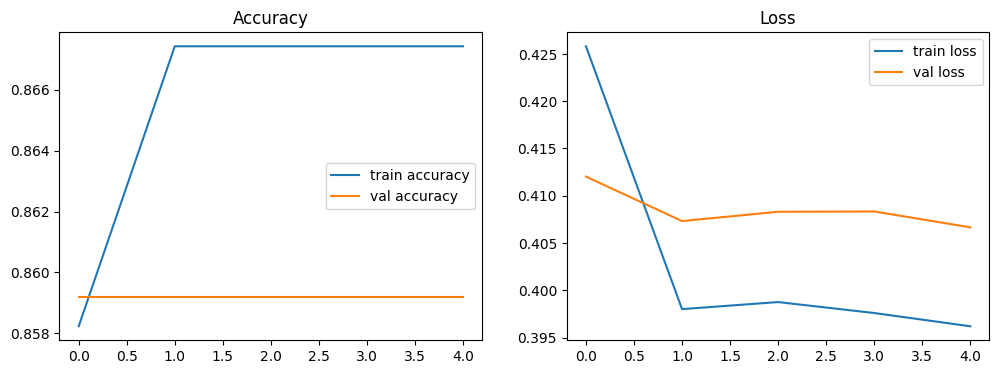

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
# Assuming dataset is in CSV format with columns 'category' and 'message'
data = pd.read_csv('/kaggle/input/spam-email-classification/email.csv')
data.columns = ['category', 'message']

# Encode labels: spam=1, ham=0
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Preprocessing
X = data['message']
y = data['category']

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

# Pad sequences to ensure uniform input size
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index)+1, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()


# WEEK 6

## A. BASIC SENTIMENT ANALYSIS USING LOGISTIC REGRESSION

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
# Dataset should have 'text' and 'sentiment' columns
df = pd.read_csv('/kaggle/input/sentiment-analysis/sentiment_analysis.csv')

# Encode labels: positive=1, neutral=0, negative=-1
df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Example: Predict sentiment of new text
new_text = ["I love this!", "It's okay, not the best.", "This is horrible."]
new_text_vectorized = vectorizer.transform(new_text)
predictions = model.predict(new_text_vectorized)
print("Predictions (1 = positive, 0 = neutral, -1 = negative):", predictions)


Accuracy: 65.00%
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66        36
     neutral       0.48      0.80      0.60        30
    positive       0.91      0.59      0.71        34

    accuracy                           0.65       100
   macro avg       0.71      0.66      0.66       100
weighted avg       0.72      0.65      0.66       100

Predictions (1 = positive, 0 = neutral, -1 = negative): [ 1 -1  0]


## b. TWITTER SENTIMENT ANALYSIS USING LSTM AND GLOVE EMBEDDINGS

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load IMDb dataset (you can download the dataset from https://ai.stanford.edu/~amaas/data/sentiment/)
# Assuming 'imdb_dataset.csv' with columns 'review' and 'sentiment' (positive=1, negative=0)
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Define a custom dataset class
class IMDbDataset(Dataset):
    def __init__(self, reviews, sentiments, tokenizer, max_len):
        self.reviews = reviews
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = self.reviews.iloc[idx]
        sentiment = self.sentiments.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            review,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'sentiment': torch.tensor(sentiment, dtype=torch.long)
        }

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create data loaders
MAX_LEN = 128
BATCH_SIZE = 16

train_dataset = IMDbDataset(X_train, y_train, tokenizer, MAX_LEN)
test_dataset = IMDbDataset(X_test, y_test, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training function
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    
    for batch in tqdm(data_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
        loss = outputs.loss
        logits = outputs.logits
        
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == sentiments)
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / len(data_loader.dataset), total_loss / len(data_loader)

# Evaluation function
def evaluate_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sentiments = batch['sentiment'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
            loss = outputs.loss
            logits = outputs.logits
            
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == sentiments)
            total_loss += loss.item()
    
    return correct_predictions.double() / len(data_loader.dataset), total_loss / len(data_loader)

# Training loop
EPOCHS = 1

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)
    print(f'Train loss {train_loss}, accuracy {train_acc}')
    
    test_acc, test_loss = evaluate_model(model, test_loader, device)
    print(f'Test loss {test_loss}, accuracy {test_acc}')

# Evaluate the model on test set
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)
        
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(sentiments.cpu().numpy())

# Print classification report
print(classification_report(y_true, y_pred, target_names=['negative', 'positive']))


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/1


100%|██████████| 2500/2500 [14:32<00:00,  2.87it/s]


Train loss 0.30962488082051276, accuracy 0.8657
Test loss 0.2514863880723715, accuracy 0.8927
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4961
    positive       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## C. MOVIE REVIEWS SENTIMENT CLASSIFICATION WITH BERT

Don't run the below....it will take time

In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load IMDb dataset
# Assuming 'imdb_dataset.csv' with columns 'review' and 'sentiment' (positive=1, negative=0)
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Define a custom dataset class
class IMDbDataset(Dataset):
    def __init__(self, reviews, sentiments, tokenizer, max_len):
        self.reviews = reviews
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = self.reviews.iloc[idx]
        sentiment = self.sentiments.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            review,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'sentiment': torch.tensor(sentiment, dtype=torch.long)
        }

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create data loaders
MAX_LEN = 128
BATCH_SIZE = 8  # Reduced batch size to save memory

train_dataset = IMDbDataset(X_train, y_train, tokenizer, MAX_LEN)
test_dataset = IMDbDataset(X_test, y_test, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Gradient accumulation settings
accumulation_steps = 4  # Adjust this value based on available memory

# Training function
def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    
    for i, batch in enumerate(tqdm(data_loader)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
        loss = outputs.loss
        
        loss = loss / accumulation_steps  # Normalize loss for accumulation
        loss.backward()  # Backpropagation
        
        if (i + 1) % accumulation_steps == 0:  # Update weights every 'accumulation_steps'
            optimizer.step()
            optimizer.zero_grad()
        
        total_loss += loss.item()
        correct_predictions += torch.sum(torch.argmax(outputs.logits, dim=1) == sentiments).item()
    
    return correct_predictions / len(data_loader.dataset), total_loss / len(data_loader)

# Evaluation function
def evaluate_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sentiments = batch['sentiment'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=sentiments)
            loss = outputs.loss
            total_loss += loss.item()
            correct_predictions += torch.sum(torch.argmax(outputs.logits, dim=1) == sentiments).item()
    
    return correct_predictions / len(data_loader.dataset), total_loss / len(data_loader)

# Training loop
EPOCHS = 1

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device)
    print(f'Train loss {train_loss}, accuracy {train_acc}')
    
    test_acc, test_loss = evaluate_model(model, test_loader, device)
    print(f'Test loss {test_loss}, accuracy {test_acc}')

# Evaluate the model on the test set
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        y_pred.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        y_true.extend(sentiments.cpu().numpy())

# Print classification report
print(classification_report(y_true, y_pred, target_names=['negative', 'positive']))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/1


100%|██████████| 5000/5000 [15:26<00:00,  5.40it/s]


Train loss 0.07945430947779678, accuracy 0.8621


KeyboardInterrupt: 